# Introduction to PyTorch

This notebook contains a small portion of the material of the original `BasicPytorch` notebook, namely the part dealing with classification by means of Feed-forward NNs. It is intended to provided a guideline on how to organize functions and classes used for network creation, training, and evaluation into `*py` files instead of embedding them directly in the notebook (this is a discouraged behaviour!)

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import scooby

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset, DataLoader 
from torchsummary import summary

from dataset import make_train_test
from model import SingleHiddenLayerNetwork
from train import train, evaluate, classification
from utils import set_seed

set_seed(42)

True

## Classification with NN

Create input dataset

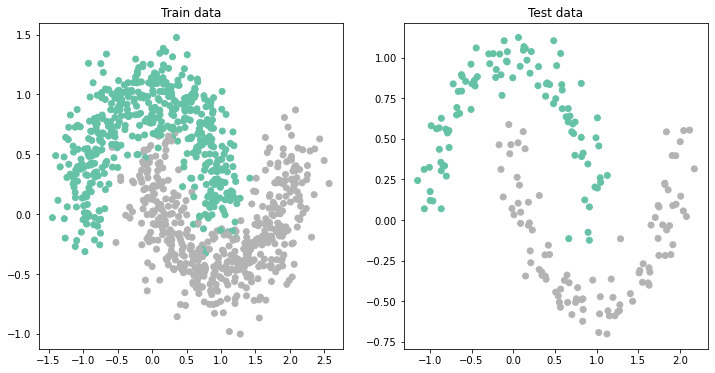

In [2]:
train_size = 1000 # Size of training data
test_size = 200 # Size of test data

X_train, y_train, X_test, y_test, train_loader, test_loader = make_train_test(train_size, test_size, noise=0.2)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Set2');
ax[1].set_title('Test data');

Train

In [3]:
network = SingleHiddenLayerNetwork(2, 8, 1)
epochs = 1000

classification(network, train_loader, test_loader, epochs)

Epoch 0, Training Loss 0.72, Training Accuracy 0.47, Test Loss 0.61, Test Accuracy 0.85
Epoch 100, Training Loss 0.26, Training Accuracy 0.88, Test Loss 0.24, Test Accuracy 0.90
Epoch 200, Training Loss 0.18, Training Accuracy 0.93, Test Loss 0.14, Test Accuracy 0.94
Epoch 300, Training Loss 0.14, Training Accuracy 0.95, Test Loss 0.10, Test Accuracy 0.97
Epoch 400, Training Loss 0.11, Training Accuracy 0.96, Test Loss 0.07, Test Accuracy 0.98
Epoch 500, Training Loss 0.10, Training Accuracy 0.97, Test Loss 0.06, Test Accuracy 0.98
Epoch 600, Training Loss 0.09, Training Accuracy 0.97, Test Loss 0.05, Test Accuracy 0.98
Epoch 700, Training Loss 0.08, Training Accuracy 0.97, Test Loss 0.04, Test Accuracy 0.98
Epoch 800, Training Loss 0.08, Training Accuracy 0.97, Test Loss 0.04, Test Accuracy 0.98
Epoch 900, Training Loss 0.08, Training Accuracy 0.97, Test Loss 0.04, Test Accuracy 0.98


Evaluate

In [4]:
bce_loss = nn.BCELoss()
type(bce_loss)

torch.nn.modules.loss.BCELoss

Test set accuracy:  0.985


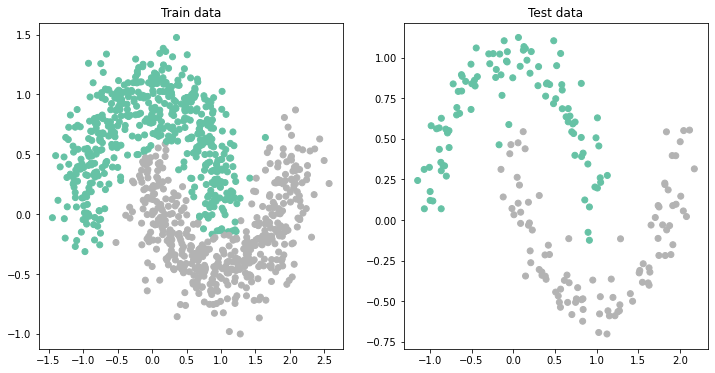

In [5]:
network.eval()
with torch.no_grad():
    a_train = network(X_train)
    a_test = network(X_test)
print("Test set accuracy: ", accuracy_score(y_test, np.where(a_test[:, 0].numpy()>0.5, 1, 0)))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=np.where(a_train[:, 0].numpy()>0.5, 1, 0), cmap='Set2')
ax[0].set_title('Train data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=np.where(a_test[:, 0].numpy()>0.5, 1, 0), cmap='Set2')
ax[1].set_title('Test data');

In [6]:
scooby.Report(core='torch')

--------------------------------------------------------------------------------
  Date: Sat Feb 12 13:59:20 2022 +03

                OS : Darwin
            CPU(s) : 16
           Machine : x86_64
      Architecture : 64bit
               RAM : 16.0 GiB
       Environment : Jupyter
       File system : apfs

  Python 3.7.11 (default, Jul 27 2021, 07:03:16)  [Clang 10.0.0 ]

             torch : 1.8.1
             numpy : 1.21.2
             scipy : 1.7.1
           IPython : 7.29.0
        matplotlib : 3.5.0
            scooby : 0.5.11

  Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------